In [2]:
#Importing Libraries
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings; 
from sklearn.preprocessing import LabelEncoder

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
data_file = '/Users/loanple/Desktop/Fall 2020/5900/Data2/columbia_capstone_fall2020_esg.csv'
data = pd.read_csv(data_file, parse_dates = ['crawled_at','harvested_at','published_at'])

In [4]:
print (min(data['published_at']))
print (max(data['published_at']))

2020-01-01 00:00:00+00:00
2020-10-18 23:54:58+00:00


In [10]:
data.describe().round(2)

,doc_sentiment,entity_relevance,entity_sentiment,event_accern_id,event_relevance,event_sentiment,provider_id,signal_relevance,signal_sentiment
count,554606.00,554606.00,554606.00,554606.00,554606.00,554606.00,554606.00,554606.00,554606.00
mean,10.39,62.38,12.56,173.07,75.43,9.00,1.41,47.46,11.03
std,22.53,36.80,33.19,9.94,25.87,30.02,1.70,25.19,27.50
min,-97.22,0.14,-97.69,155.00,2.23,-100.00,1.00,1.10,-97.57
25%,-1.09,24.75,-0.69,165.00,52.50,-1.50,1.00,28.75,-2.25
50%,10.82,90.00,11.11,177.00,90.00,10.19,1.00,45.00,11.22
75%,22.60,100.00,26.85,178.00,90.00,23.26,1.00,60.71,25.00
max,91.37,100.00,94.44,195.00,100.00,93.75,9.00,100.00,92.71


### <font color=red> Document Source, Document URL, Observations, Unique Values </font>

In [11]:
rows = data.shape[0]

In [12]:
dsource = data['doc_source'].unique().size
durl = data['doc_url'].unique().size

print("There are", f"{rows:,d}", "rows from", f"{durl:,d}", "unique document url that are sourced from", f"{dsource:,d}", "links.")
print("\n{:.2%}".format(durl/rows), "of the", f"{rows:,d}","observations come from unique url articles.")

There are 554,606 rows from 337,024 unique document url that are sourced from 31,490 links.

60.77% of the 554,606 observations come from unique url articles.


In [21]:
print("Unique count for key variables: ")
print("\nDOCUMENT DETAILS\ndoc_source: ", data['doc_source'].nunique())
print("doc_url: ", data['doc_url'].nunique())
print("doc_type: ", data['doc_type'].nunique())

print("\nCOMPANY DETAILS\nentity_name: ", data['entity_name'].nunique())
print("entity_sector: ", data['entity_sector'].nunique())
print("entity_region: ", data['entity_region'].nunique())
print("entity_country ", data['entity_country'].nunique())

print("\nEVENT DETAILS\nevent: ", data['event'].nunique())
print("event_group: ", data['event_group'].nunique())

Unique count for key variables: 

DOCUMENT DETAILS
doc_source:  31489
doc_url:  337024
doc_type:  2

COMPANY DETAILS
entity_name:  7090
entity_sector:  19
entity_region:  7
entity_country  56

EVENT DETAILS
event:  23
event_group:  3


### 19 Unique Entity Sector

[]

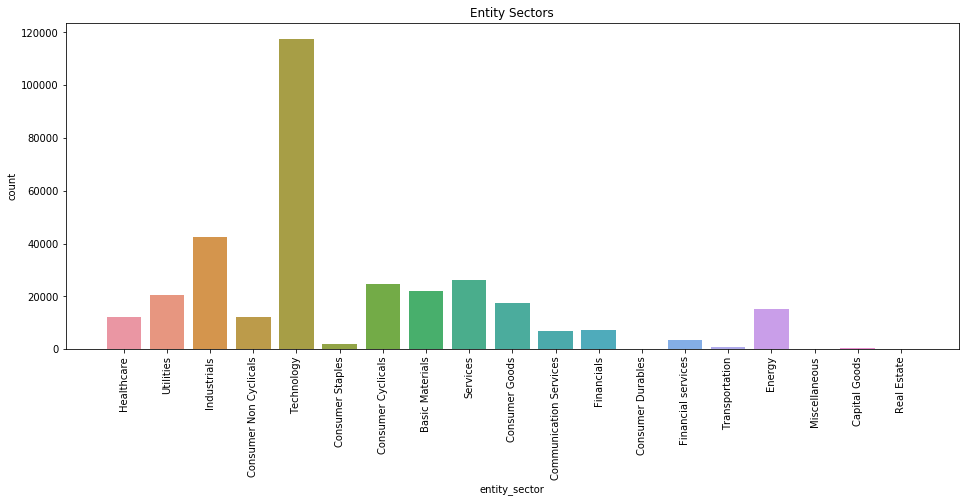

In [22]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'entity_sector', data = data)
plt.title('Entity Sectors')
plt.xticks(rotation = 90)
plt.plot()

##### It can be observed that majority of the data is of entities that belong to Technology sector followed by Industrials and healthcare

[]

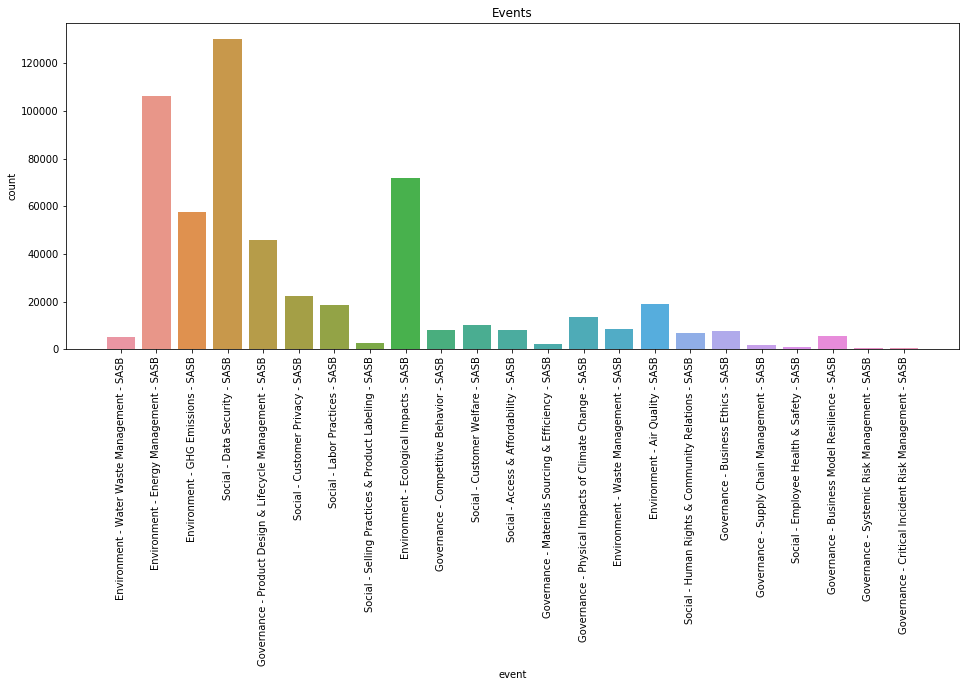

In [23]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'event', data = data)
plt.title('Events')
plt.xticks(rotation = 90)
plt.plot()

#### It can be observed that majority of the records were for the events Social (Data Security), Environment (Energy Mgmt), Environment (Ecological Impacts)

## Event Groups

[]

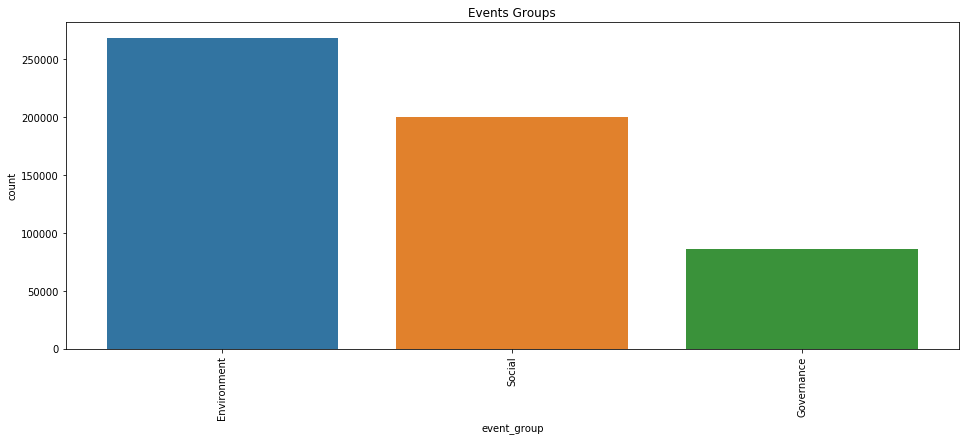

In [24]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'event_group', data = data)
plt.title('Events Groups')
plt.xticks(rotation = 90)
plt.plot()

In [28]:
entity_sector_in_esg = data.groupby("event_group", as_index =True)["entity_sector"].count()

print("Counting all observations from entity sectors within ESG Vertical: ")
entity_sector_in_esg

Counting all observations from entity sectors within ESG Vertical: 


event_group
Environment    149442
Governance      49726
Social         132751
Name: entity_sector, dtype: int64

In [29]:
events_in_esg = data.groupby("event_group", as_index =True)["event"].count()

print("Counting all observations from events within ESG Vertical: ")
events_in_esg

Counting all observations from events within ESG Vertical: 


event_group
Environment    268592
Governance      85974
Social         200040
Name: event, dtype: int64

##### The events with high relevance are social (data security), social (labor practices), social(employ diversity and inclusion)

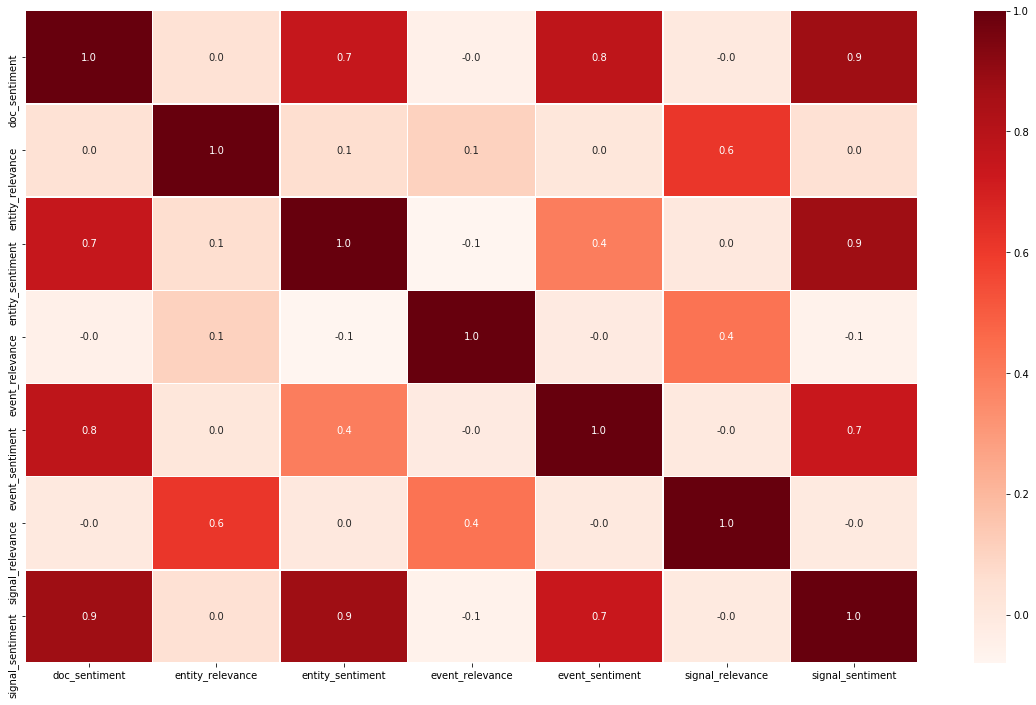

In [30]:
# Check for multicollinearity using correlation plot
corr = data[['doc_sentiment', 'entity_relevance', 'entity_sentiment', 'event_relevance', 'event_sentiment', 'signal_relevance', 'signal_sentiment']].corr()
f,ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap='Reds', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

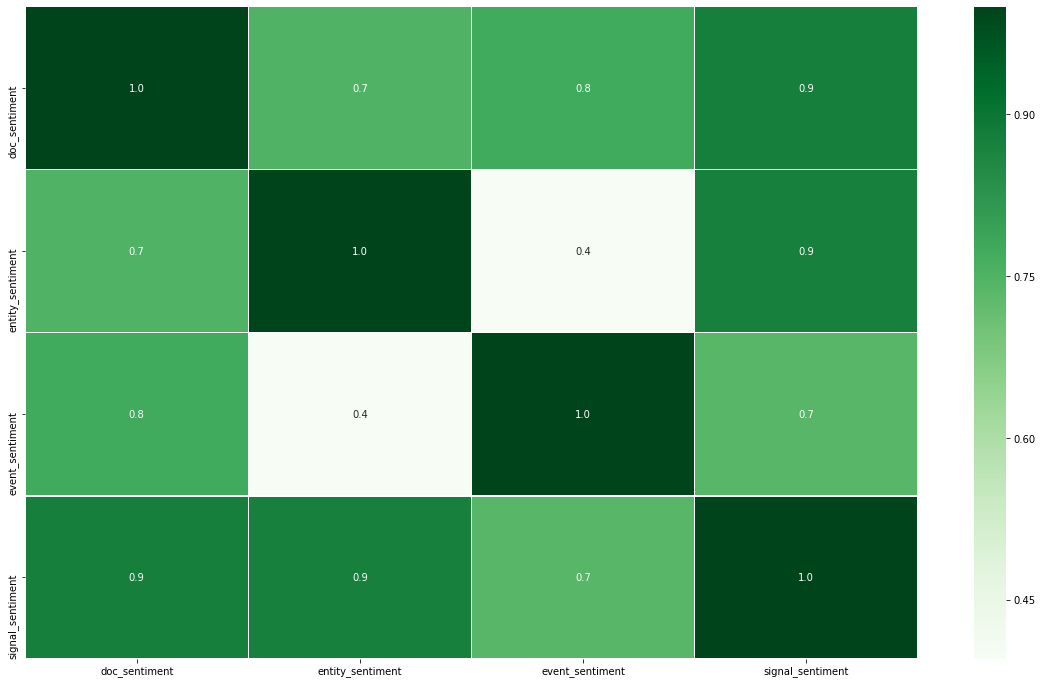

In [31]:
# Check for multicollinearity using correlation plot
corr = data[['doc_sentiment', 'entity_sentiment', 'event_sentiment', 'signal_sentiment']].corr()
f,ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

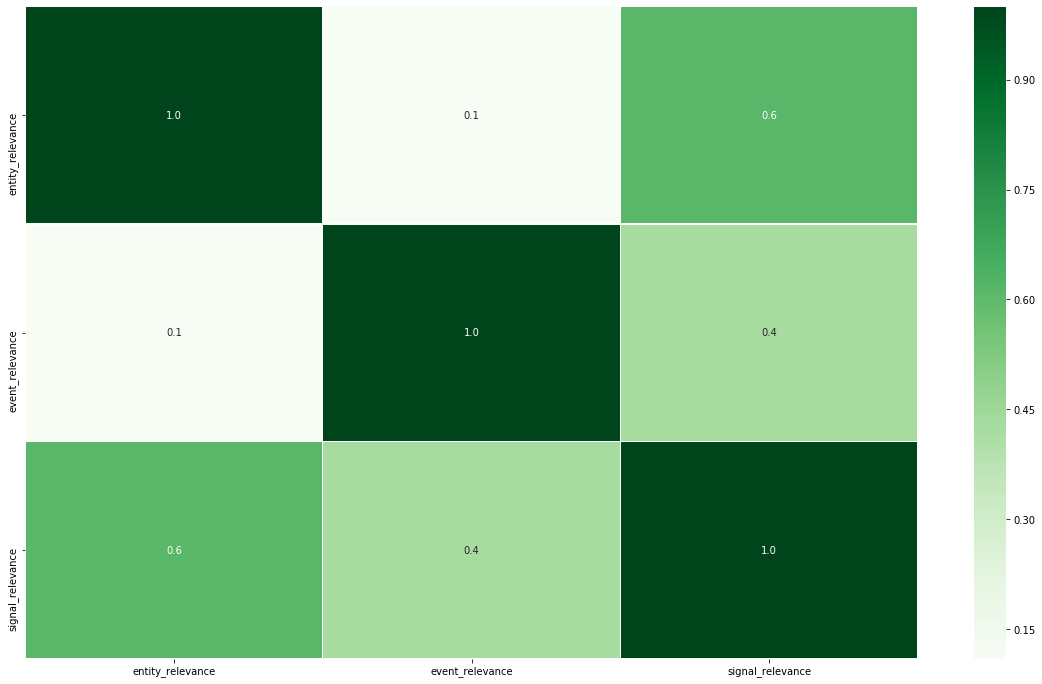

In [32]:
# Check for multicollinearity using correlation plot
corr = data[['entity_relevance', 'event_relevance', 'signal_relevance']].corr()
f,ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Country & Region

#### Studying region-wise average event sentiment

In [33]:
locationWise = data.groupby(['entity_region'])['event_sentiment'].mean().round(2).reset_index(name='Average_event_sentiment')
locationWise

,entity_region,Average_event_sentiment
0,Africa,4.51
1,Americas,8.77
2,Arctic,13.45
3,Asia,12.36
4,Australiasia,7.02
5,Europe,7.87
6,Middle East,15.85


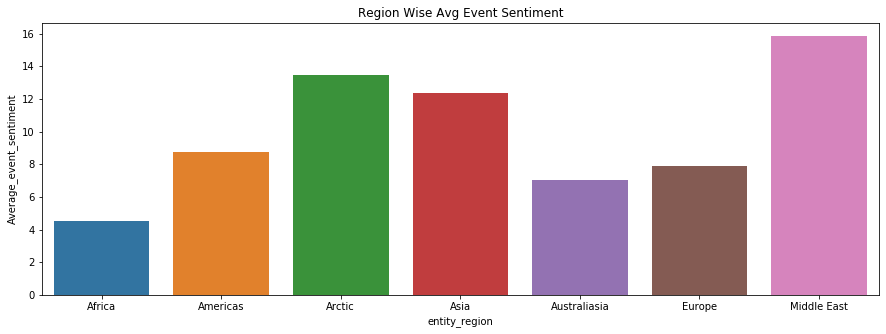

In [34]:
plt.figure(figsize=(15, 5))
plt.title('Region Wise Avg Event Sentiment')
sns.barplot(locationWise['entity_region'], locationWise['Average_event_sentiment'])

#### Studying country-wise average event sentiment

In [35]:
locationWise_event_sentiment = data.groupby(['entity_country'])['event_sentiment'].mean().round(2).reset_index(name='Average_event_sentiment')
locationWise_event_sentiment

,entity_country,Average_event_sentiment
0,Argentina,20.67
1,Australia,6.97
2,Austria,7.07
3,Bangladesh,31.06
4,Belgium,10.50
5,Brazil,11.35
6,Canada,8.42
7,Chile,1.65
8,China,8.59
9,Colombia,19.37


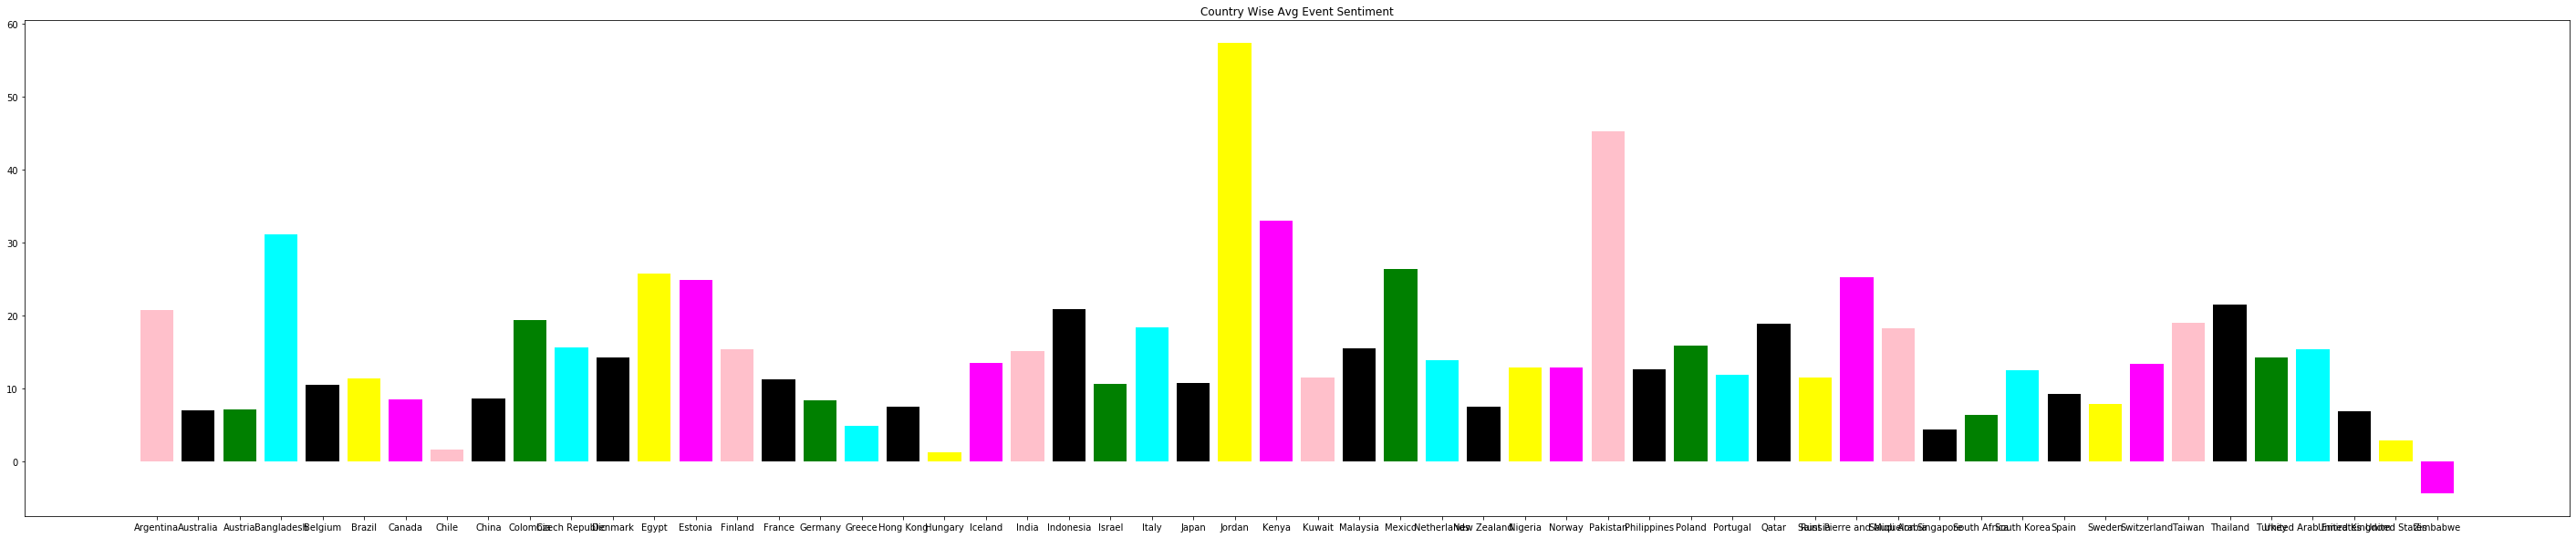

In [39]:
plt.figure(figsize=(50,10))
plt.bar(locationWise_event_sentiment['entity_country'], locationWise_event_sentiment['Average_event_sentiment'], 
        color = ['pink', 'black', 'green', 'cyan','black','yellow','magenta'])
plt.title('Country Wise Avg Event Sentiment')
plt.show()

#### Studying country-wise average event relevance

In [40]:
locationWise_event_relevance = data.groupby(['entity_country'])['event_relevance'].mean().round(2).reset_index(name='Average_event_relevance')
locationWise_event_relevance

,entity_country,Average_event_relevance
0,Argentina,74.09
1,Australia,74.47
2,Austria,62.60
3,Bangladesh,51.75
4,Belgium,76.38
5,Brazil,75.38
6,Canada,74.78
7,Chile,80.81
8,China,78.96
9,Colombia,94.44


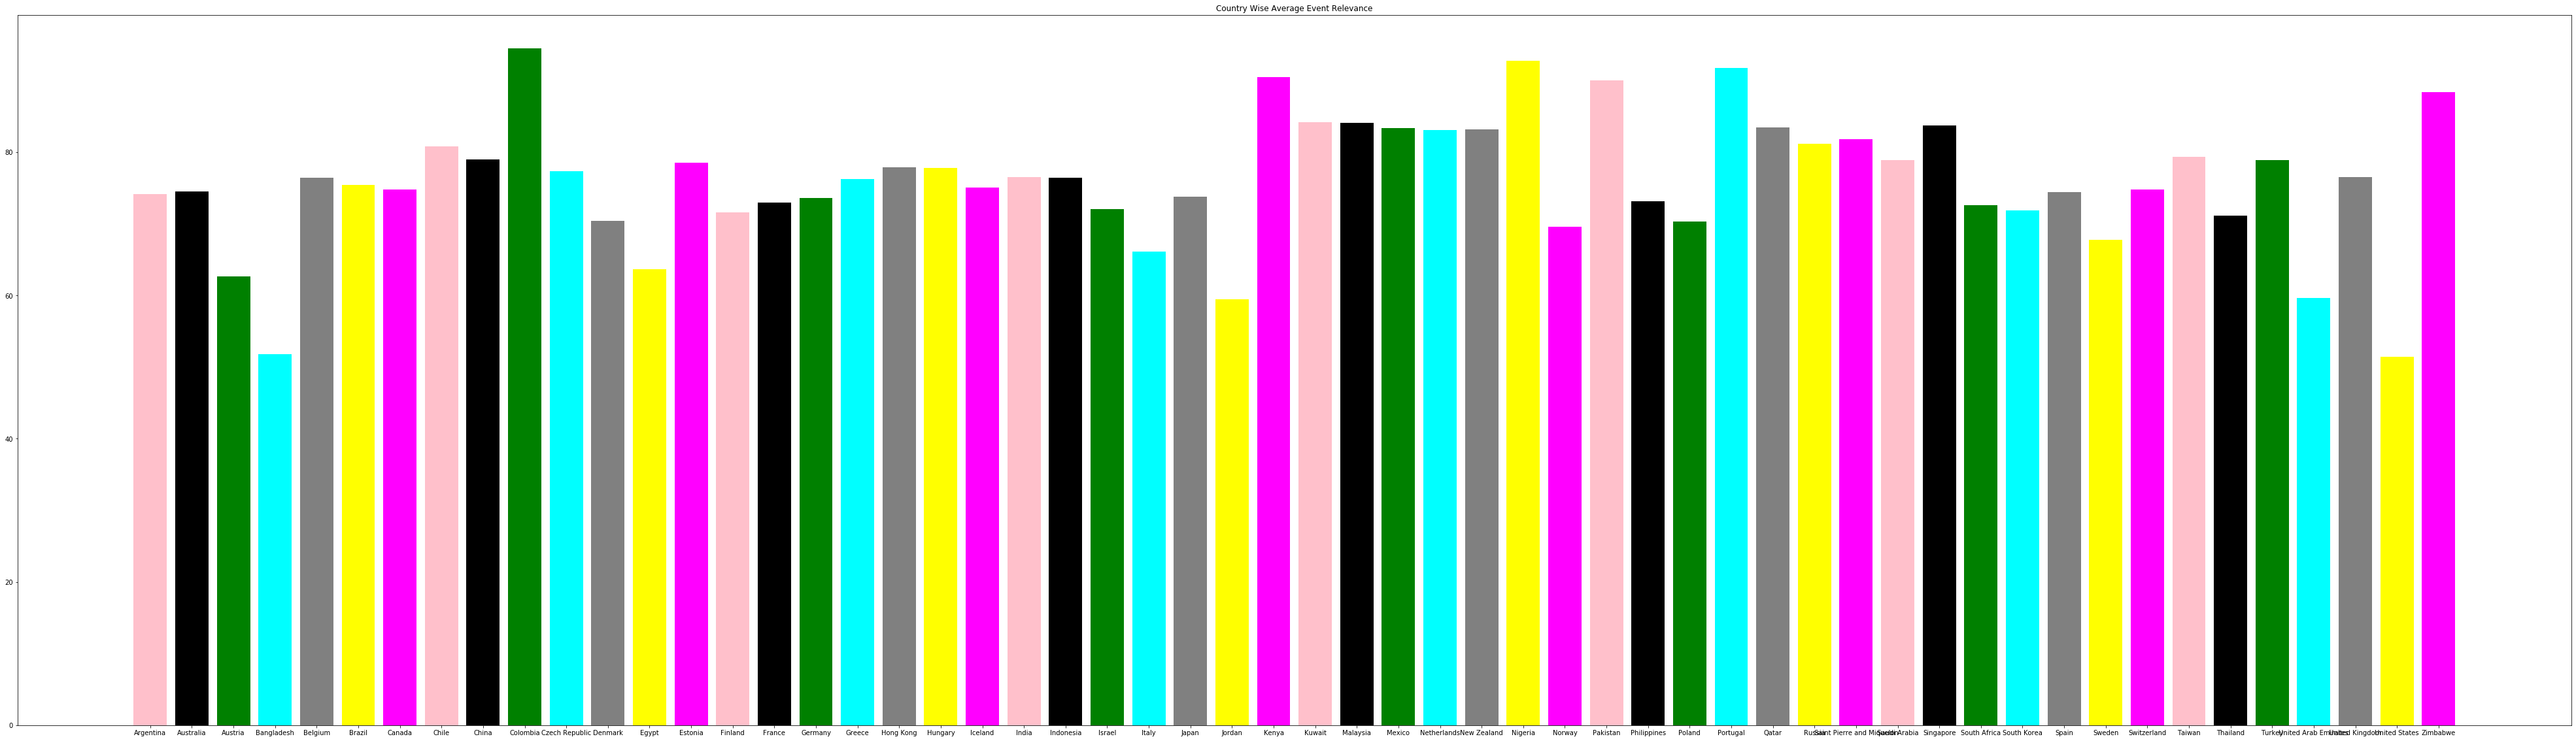

In [45]:
plt.figure(figsize=(70,20))
plt.bar(locationWise_event_relevance['entity_country'], locationWise_event_relevance['Average_event_relevance'], 
        color = ['pink', 'black', 'green', 'cyan','grey','yellow','magenta'])
plt.title('Country Wise Average Event Relevance')
plt.show()

### <font color=red> Everything below: </font>

#### % of **Event group counts** within each **entity region**: 

In [46]:
event_group_region = data.groupby(["entity_region","event_group"]).agg({'event_group': 'count'})
eg = data.groupby(['entity_region']).agg({'event_group': 'count'})

(event_group_region.div(eg, level='entity_region') * 100).round(2)

event_group
entity_region event_group             
Africa        Environment        51.33
              Governance         21.17
              Social             27.50
Americas      Environment        52.97
              Governance         15.79
              Social             31.24
Arctic        Environment        30.86
              Governance         13.14
              Social             56.00
Asia          Environment        50.38
              Governance         19.21
              Social             30.41
Australiasia  Environment        54.12
              Governance         19.26
              Social             26.62
Europe        Environment        44.50
              Governance         13.71
              Social             41.78
Middle East   Environment        47.65
              Governance         26.88
              Social             25.46

##### **Americans and Europe** show a focus first on Environment then Social.

##### **Asia** shows a focus on Environment then Governance and Social tie closely.

##### **Australiasia** show a focus on Environment then Governance then Social.

## **Events** within each **entity region**: 

### Americas

In [47]:
americas_data = data[data["entity_region"]=="Americas"] #subsetting for Americas region
americas_data["event"].value_counts().head(10)

Environment - Energy Management - SASB                       8624
Environment - Ecological Impacts - SASB                      7561
Social - Data Security - SASB                                7382
Environment - GHG Emissions - SASB                           6573
Governance - Product Design & Lifecycle Management - SASB    3585
Social - Customer Privacy - SASB                             2097
Social - Labor Practices - SASB                              1957
Governance - Physical Impacts of Climate Change - SASB       1607
Social - Access & Affordability - SASB                       1157
Environment - Air Quality - SASB                             1111
Name: event, dtype: int64

In [48]:
print("Top entity sectors for this region: ")
americas_data["entity_sector"].value_counts().head()

Top entity sectors for this region: 


Basic Materials    10821
Healthcare          7080
Energy              5132
Technology          4771
Industrials         3053
Name: entity_sector, dtype: int64

### Europe

In [49]:
europe_data = data[data["entity_region"]=="Europe"] #subsetting for Europe region
europe_data["event"].value_counts().head(10)

Social - Data Security - SASB                                69358
Environment - Energy Management - SASB                       44872
Environment - GHG Emissions - SASB                           27385
Environment - Ecological Impacts - SASB                      25536
Governance - Product Design & Lifecycle Management - SASB    17538
Social - Customer Privacy - SASB                             12515
Social - Labor Practices - SASB                               8561
Environment - Air Quality - SASB                              5249
Social - Customer Welfare - SASB                              4740
Governance - Competitive Behavior - SASB                      4627
Name: event, dtype: int64

In [50]:
print("Top entity sectors for this region: ")
europe_data["entity_sector"].value_counts().head()

Top entity sectors for this region: 


Technology        94519
Industrials       32965
Services          23258
Consumer Goods    16374
Utilities         15651
Name: entity_sector, dtype: int64

### Asia

In [51]:
asia_data = data[data["entity_region"]=="Asia"] #subsetting for Asia region
asia_data["event"].value_counts().head(10)

Environment - Energy Management - SASB                       16277
Social - Data Security - SASB                                13996
Environment - Ecological Impacts - SASB                      10415
Governance - Product Design & Lifecycle Management - SASB     6836
Environment - GHG Emissions - SASB                            4039
Governance - Business Model Resilience - SASB                 3004
Social - Labor Practices - SASB                               2440
Social - Customer Privacy - SASB                              1201
Governance - Physical Impacts of Climate Change - SASB         854
Governance - Competitive Behavior - SASB                       849
Name: event, dtype: int64

In [75]:
print("Top entity sectors for this region: ")
asia_data["entity_sector"].value_counts().head()

Top entity sectors for this region: 


Consumer Cyclicals        8945
Consumer Non Cyclicals      78
Technology                   1
Name: entity_sector, dtype: int64

### Australiasia

In [52]:
australiasia_data = data[data["entity_region"]=="Australiasia"] #subsetting for Australasia region
australiasia_data["event"].value_counts().head()

Social - Data Security - SASB              12794
Environment - Ecological Impacts - SASB    11171
Environment - Air Quality - SASB           10599
Environment - Energy Management - SASB     10474
Environment - GHG Emissions - SASB          8511
Name: event, dtype: int64

In [53]:
print("Top entity sectors for this region: ")
australiasia_data["entity_sector"].value_counts().head()

Top entity sectors for this region: 


Financials                1492
Communication Services    1189
Financial services        1153
Technology                 487
Consumer Cyclicals         404
Name: entity_sector, dtype: int64

In [58]:
australiasia_data = data[data["entity_region"]=="Australiasia"] #subsetting for Australasia region
australiasia_data["event"].value_counts().head()

Social - Data Security - SASB              12794
Environment - Ecological Impacts - SASB    11171
Environment - Air Quality - SASB           10599
Environment - Energy Management - SASB     10474
Environment - GHG Emissions - SASB          8511
Name: event, dtype: int64

In [64]:
temp = data["entity_sector"].value_counts()
data["entity_sector"].value_counts()

temp['Percentage of total'] = ((data["entity_sector"].value_counts() /data["entity_sector"].value_counts().sum()) * 100).round(2)
temp = pd.DataFrame(temp['Percentage of total']).reset_index()
temp.rename(columns={'index':'entity_sector','entity_sector':'Percentage of total'}, inplace=True)
temp.head(5)

,entity_sector,Percentage of total
0,Technology,35.46
1,Industrials,12.81
2,Services,7.85
3,Consumer Cyclicals,7.45
4,Basic Materials,6.64


In [62]:
temp = data["entity_name"].value_counts()
data["entity_name"].value_counts()

temp['Percentage of total'] = ((data["entity_name"].value_counts() /data["entity_name"].value_counts().sum()) * 100).round(2)
temp = pd.DataFrame(temp['Percentage of total']).reset_index()
temp.rename(columns={'index':'entity_name','entity_name':'Percentage of total'}, inplace=True)
temp[0:10]

,entity_name,Percentage of total
0,Alphabet Inc,6.29
1,Apple Inc,3.42
2,Amazon.com Inc,3.33
3,EPHRAIM RESOURCES LTD,2.04
4,Intel Corporation,1.39
5,ENCORE ENERGY CORP,1.35
6,BP PLC,1.27
7,INTL BUSINESS MACHINES CORP,0.98
8,Ford Motor Company,0.90
9,Philip Morris International Inc,0.87


In [67]:
data["event"].value_counts().head()

Social - Data Security - SASB                                130313
Environment - Energy Management - SASB                       106439
Environment - Ecological Impacts - SASB                       71688
Environment - GHG Emissions - SASB                            57528
Governance - Product Design & Lifecycle Management - SASB     45921
Name: event, dtype: int64

In [70]:
ds = data[data["event"]=="Social - Data Security - SASB"]
ds["event_hits"].value_counts().head()

["cybersecurity"]     16012
["encryption"]        12004
["malware"]           10206
["cyber security"]     6279
["phishing"]           4191
Name: event_hits, dtype: int64

In [72]:
ds = data[data["event"]=="Environment - Energy Management - SASB"]
ds["event_hits"].value_counts().head()

["electric vehicles"]    30980
["renewable energy"]     27439
["energy efficient"]      5157
["energy efficiency"]     4108
["energy star"]           2232
Name: event_hits, dtype: int64

In [73]:
ds = data[data["event"]=="Environment - Ecological Impacts - SASB"]
ds["event_hits"].value_counts().head()

["eco friendly"]     10234
["clean energy"]      9855
["safe", "water"]     4863
["erosion"]           4304
["solar power"]       4135
Name: event_hits, dtype: int64

In [74]:
ds = data[data["event"]=="Environment - GHG Emissions - SASB"]
ds["event_hits"].value_counts().head()

["carbon footprint"]    4632
["carbon neutral"]      4215
["zero emissions"]      3880
["carbon dioxide"]      3126
["global warming"]      2597
Name: event_hits, dtype: int64

In [75]:
ds = data[data["event"]=="Governance - Product Design & Lifecycle Management - SASB"]
ds["event_hits"].value_counts().head()

["intellectual property"]    24970
["zero emissions"]            6710
["recyclable"]                4762
["energy star"]               2757
["industrial design"]         1583
Name: event_hits, dtype: int64